# Fig 6. Age of acquisition(AoA) for in- and out-of- vocabulary words

1.Load AoA data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'vocab_class_AoA.xlsx' 
xls = pd.ExcelFile(file_path)

iv_enabled_df = xls.parse('iv-enabled')
oov_enabled_df = xls.parse('oov-enabled')

def parse_accuracy(acc_str):
    # Remove '%' and split by the '±' symbol
    if isinstance(acc_str, str) and '±' in acc_str:
        mean, std = acc_str.replace('%', '').split('±')
        return float(mean), float(std)
    return np.nan, np.nan

iv_enabled_df['accuracy_mean'], iv_enabled_df['accuracy_std'] = zip(*iv_enabled_df['accuracy'].map(parse_accuracy))
oov_enabled_df['accuracy_mean'], oov_enabled_df['accuracy_std'] = zip(*oov_enabled_df['accuracy'].map(parse_accuracy))

iv_enabled_filtered = iv_enabled_df[['accuracy_mean', 'Rating.Mean']].dropna()
oov_enabled_filtered = oov_enabled_df[['accuracy_mean', 'Rating.Mean']].dropna()

iv_mean_aoa = iv_enabled_filtered['Rating.Mean'].mean()
iv_mean_accuracy = iv_enabled_filtered['accuracy_mean'].mean()

oov_mean_aoa = oov_enabled_filtered['Rating.Mean'].mean()
oov_mean_accuracy = oov_enabled_filtered['accuracy_mean'].mean()

2. Plot

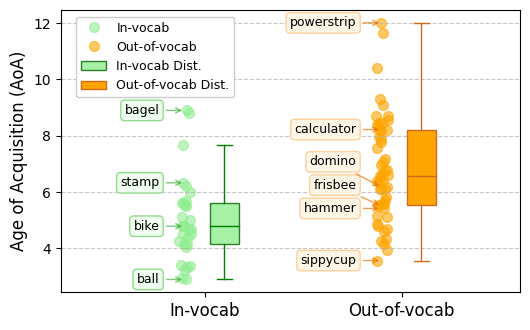

In [2]:
plt.figure(figsize=(5.4, 3.4))  # Wider figure to accommodate labels

iv_pos = 0
oov_pos = 1  # Increased spacing between groups
label_offset = 0.13  # Distance between labels and scatter
scatter_box_offset = 0.2 # Distance between scatter and boxplot
width = 0.15  # Width of the box
jitter_width = 0.03  # Scatter spread

# Find extreme values and top accuracy classes for in-vocab
iv_min_idx = iv_enabled_filtered['Rating.Mean'].idxmin()
iv_max_idx = iv_enabled_filtered['Rating.Mean'].idxmax()
# Get top 5 accuracy classes
iv_top_indices = iv_enabled_df['accuracy_mean'].nlargest(2).index

# Same for out-of-vocab
oov_min_idx = oov_enabled_filtered['Rating.Mean'].idxmin()
oov_max_idx = oov_enabled_filtered['Rating.Mean'].idxmax()
oov_top_indices = oov_enabled_df['accuracy_mean'].nlargest(4).index

# Function to create label positions
def create_label_positions(values, base_pos):
    y_positions = values.tolist()  # Convert Series to list
    y_positions.sort()
    spacing = (max(y_positions) - min(y_positions)) / (len(y_positions) * 1.7) # space between labels
    
    # Adjust positions to avoid overlap
    for i in range(1, len(y_positions)):
        if y_positions[i] - y_positions[i-1] < spacing:
            y_positions[i] = y_positions[i-1] + spacing
    
    return {val: pos for val, pos in zip(values, y_positions)}

# In-vocab labels
label_values = iv_enabled_filtered.loc[[iv_min_idx, iv_max_idx] + list(iv_top_indices)]['Rating.Mean']
label_positions = create_label_positions(label_values, iv_pos)

# In-vocab scatter plot
x_jitter = np.random.uniform(-jitter_width, jitter_width, size=len(iv_enabled_filtered))
scatter_x_iv = [iv_pos + x for x in x_jitter]
scatter_iv = plt.scatter(scatter_x_iv, iv_enabled_filtered['Rating.Mean'],
           color='lightgreen', alpha=0.6, s=50, label='In-vocab')

# In-vocab labels
iv_indices = [iv_min_idx, iv_max_idx] + list(iv_top_indices)
# Sort indices based on AoA values
iv_indices = sorted(iv_indices, key=lambda x: iv_enabled_filtered.loc[x, 'Rating.Mean'])

label_values = iv_enabled_filtered.loc[iv_indices]['Rating.Mean']
label_positions = create_label_positions(label_values, iv_pos)

for idx in iv_indices:
    plt.annotate(f"{iv_enabled_df.iloc[idx]['class']}",
                xy=(iv_pos, iv_enabled_filtered.loc[idx, 'Rating.Mean']),
                xytext=(iv_pos - label_offset, label_positions[iv_enabled_filtered.loc[idx, 'Rating.Mean']]),
                ha='right', va='center', fontsize=9, zorder=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='honeydew', alpha=1, edgecolor='#91db8e'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#44b240', alpha=0.7))


# In-vocab box
bp1 = plt.boxplot(iv_enabled_filtered['Rating.Mean'],
                 positions=[iv_pos + scatter_box_offset],
                 widths=width,
                 patch_artist=True,
                 showfliers=False)
for element in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='green')
plt.setp(bp1['boxes'], facecolor='lightgreen', alpha=0.8, edgecolor='darkgreen')


# Out-of-vocab scatter
x_jitter = np.random.uniform(-jitter_width, jitter_width, size=len(oov_enabled_filtered))
scatter_x_oov = [oov_pos + x for x in x_jitter]
scatter_oov =plt.scatter(scatter_x_oov, oov_enabled_filtered['Rating.Mean'],
           color='orange', alpha=0.6, s=50, label='Out-of-vocab')

# Out-of-vocab labels
oov_indices = [oov_min_idx, oov_max_idx] + list(oov_top_indices)
# Sort indices based on AoA values
oov_indices = sorted(oov_indices, key=lambda x: oov_enabled_filtered.loc[x, 'Rating.Mean'])

label_values = oov_enabled_filtered.loc[oov_indices]['Rating.Mean']
label_positions = create_label_positions(label_values, oov_pos)

for idx in oov_indices:
    plt.annotate(f"{oov_enabled_df.iloc[idx]['class']}",
                xy=(oov_pos, oov_enabled_filtered.loc[idx, 'Rating.Mean']),
                xytext=(oov_pos - label_offset, label_positions[oov_enabled_filtered.loc[idx, 'Rating.Mean']]),
                ha='right', va='center', fontsize=9, zorder=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='oldlace', alpha=1, edgecolor='#FFCF9D'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='#ec7702', alpha=0.7))

# Out-of-vocab box
bp2 = plt.boxplot(oov_enabled_filtered['Rating.Mean'],
                 positions=[oov_pos + scatter_box_offset],
                 widths=width,
                 patch_artist=True,
                 showfliers=False)
for element in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
    plt.setp(bp2[element], color='chocolate')
plt.setp(bp2['boxes'], facecolor='orange', alpha=1, edgecolor='chocolate')

# Customize the plot
plt.xticks([iv_pos + scatter_box_offset/2, oov_pos + scatter_box_offset/2], 
           ['In-vocab', 'Out-of-vocab'], fontsize=12)
plt.ylabel("Age of Acquisition (AoA)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.title("AoA Distribution by Vocabulary Type", fontsize=14)

# Adjust plot limits to accommodate labels
plt.xlim(iv_pos - label_offset - 0.5, oov_pos + scatter_box_offset + 0.5)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='lightgreen',
           markeredgecolor='lightgreen',  
           markersize=np.sqrt(50),  
           alpha=0.6, 
           label='In-vocab'),
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='orange',
           markeredgecolor='orange',  
           markersize=np.sqrt(50),  
           alpha=0.6, 
           label='Out-of-vocab'),
    
    Patch(facecolor='lightgreen', alpha=0.8, edgecolor='darkgreen',
          label='In-vocab Dist.'),
    Patch(facecolor='orange', alpha=1.0, edgecolor='chocolate',
          label='Out-of-vocab Dist.')
]

# Add legend
plt.legend(handles=legend_elements, 
          loc='upper left',
          bbox_to_anchor=(0.02, 0.999),
          fontsize=9,
          framealpha=1)

plt.tight_layout()
plt.savefig("fig/AoA_scatter_box.pdf", dpi=300, bbox_inches='tight')
plt.show()